# Pattern recognition project
## Dataset: Daily and Sports Activities: [(link)](https://archive.ics.uci.edu/dataset/256/daily+and+sports+activities)
### By: Hamidreza Abooei, 402617509



initiallization

In [129]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier       
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from scipy.fft import fft
from scipy import stats


Read data test

In [18]:
data_path = "D:\\1-Master\\1-term1\Pattern recognition\Project"
df = pd.read_csv(data_path + '/data/a01/p1/s01.txt', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.15730,0.70097,...,-0.036453,-2.8071,-9.0812,2.6220,-0.000232,-0.012092,-0.004457,0.74017,0.30053,-0.057730
1,8.1305,1.0202,5.3843,-0.009368,0.023485,0.001953,-0.78717,-0.068275,0.15890,0.71829,...,-0.034005,-2.8146,-9.0737,2.6218,-0.014784,-0.016477,0.002789,0.73937,0.30183,-0.057514
2,8.1604,1.0201,5.3622,0.015046,0.014330,0.000204,-0.78664,-0.068277,0.15879,0.69849,...,-0.036489,-2.8221,-9.0886,2.6366,-0.012770,0.005717,-0.007918,0.73955,0.30052,-0.057219
3,8.1603,1.0052,5.3770,0.006892,0.018045,0.005649,-0.78529,-0.069849,0.15912,0.72799,...,-0.036151,-2.8071,-9.0811,2.6070,-0.005725,0.009620,0.006555,0.74029,0.30184,-0.057750
4,8.1605,1.0275,5.3473,0.008811,0.030433,-0.005346,-0.78742,-0.068796,0.15916,0.71572,...,-0.033807,-2.8146,-9.0737,2.6218,-0.003929,-0.008371,0.002816,0.73845,0.30090,-0.057527


In [6]:
print(np.shape(df))

(125, 45)


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,7.975714,1.083150,5.606846,0.004897,0.026123,-0.003726,-0.790726,-0.068490,0.135897,0.679134,...,-0.035894,-2.814833,-9.085131,2.618207,-0.005036,0.002166,-0.003155,0.739615,0.301314,-0.057119
std,0.119981,0.046987,0.181035,0.015592,0.036279,0.007920,0.002870,0.001751,0.015907,0.039324,...,0.001074,0.019892,0.013178,0.018793,0.007633,0.007310,0.007074,0.000850,0.000792,0.000823
min,7.682300,0.997440,5.316900,-0.039399,-0.080639,-0.030754,-0.795540,-0.071582,0.109560,0.585420,...,-0.039347,-2.867500,-9.112400,2.571100,-0.024685,-0.019207,-0.021531,0.737520,0.299680,-0.059241
25%,7.876300,1.035000,5.436400,-0.005710,0.010725,-0.008867,-0.793210,-0.069849,0.119820,0.649210,...,-0.036599,-2.822500,-9.089400,2.608400,-0.009489,-0.003025,-0.007918,0.739000,0.300710,-0.057598
50%,7.958700,1.080700,5.608100,0.005122,0.023588,-0.003457,-0.791610,-0.068773,0.135040,0.688700,...,-0.035765,-2.815000,-9.088600,2.622000,-0.005644,0.001586,-0.002558,0.739550,0.301320,-0.057208
75%,8.108200,1.124000,5.749300,0.014090,0.043022,0.001953,-0.787430,-0.067195,0.155050,0.708470,...,-0.035240,-2.807500,-9.074500,2.625000,-0.000232,0.007598,0.001253,0.740240,0.301830,-0.056500
max,8.160500,1.183200,6.181400,0.045403,0.214760,0.015614,-0.785290,-0.064353,0.159160,0.759300,...,-0.033109,-2.747600,-9.044500,2.669600,0.015853,0.020288,0.013777,0.742380,0.303420,-0.054963


Flatten data without preprocessing

In [11]:
a = df.to_numpy().flatten()
print(np.shape(a))


(5625,)


## Phase 0 - (Read all data)

In [12]:
def read_my_data(filename):
    """
    A function which will take the text file name and return the data
    """
    df = pd.read_csv('{}'.format(filename), header=None)
    flatten_data = df.to_numpy().flatten()
    return flatten_data

In [23]:
data_list = []
patient_label_list = []
activity_label_list = []
os.chdir(data_path+"\data\\")
activity_list = os.listdir()

for activity in activity_list:
    print(activity)
    os.chdir(activity)
    patients_list = os.listdir()

    for patient in patients_list:
        os.chdir(patient)
        segment_list = os.listdir()

        for segment in segment_list:
            data_list.append(read_my_data(segment))
            patient_label_list.append(patient)
            activity_label_list.append(activity)
            
        os.chdir('../')
    os.chdir('../')
os.chdir('../')


a01
a02
a03
a04
a05
a06
a07
a08
a09
a10
a11
a12
a13
a14
a15
a16
a17
a18
a19


In [24]:
print(np.shape(data_list))
print(np.shape(patient_label_list))
print(np.shape(activity_label_list))

(9120, 5625)
(9120,)
(9120,)


## Phase 1 (classification without preprocessing and Feature selection)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data_list, activity_label_list, test_size=0.3)

svc_model=SVC()   
ovo_model=OneVsOneClassifier(svc_model)
ovo_model.fit(X_train,y_train)
y_pred = ovo_model.predict(X_test)
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)
plt.show()
print(accuracy_score(y_test, y_pred))

NameError: name 'plt' is not defined

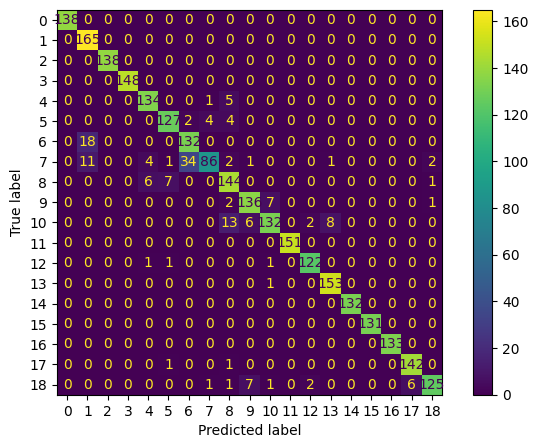

0.9389619883040936


In [34]:
fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

Let's use Decision Tree Classification as well, it uses not normalized data

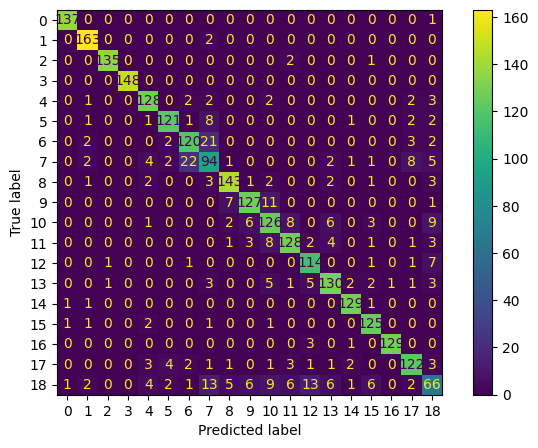

0.8717105263157895


In [35]:
model = DecisionTreeClassifier()       
model.fit(X_train, y_train)             
y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

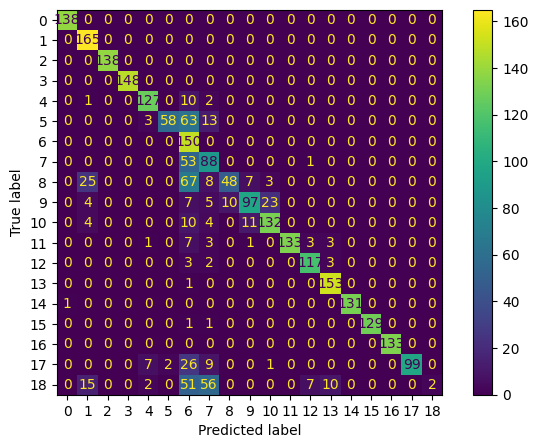

0.7989766081871345


In [46]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

Add normalization

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

SVM with normalization

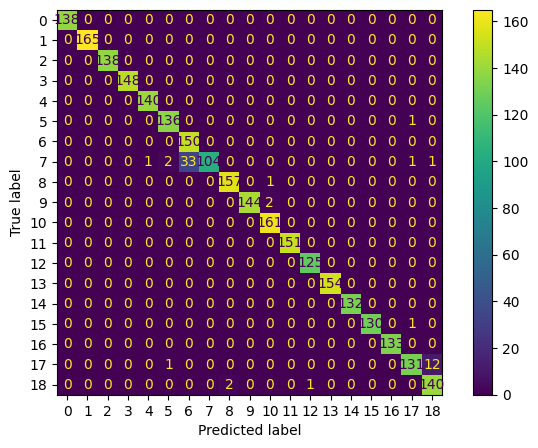

0.9784356725146199


In [44]:
svc_model=SVC()   
ovo_model=OneVsOneClassifier(svc_model)
ovo_model.fit(X_train_normalized,y_train)
y_pred = ovo_model.predict(X_test_normalized)
fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

Let's use Decision Tree Classification as well, it uses normalized data

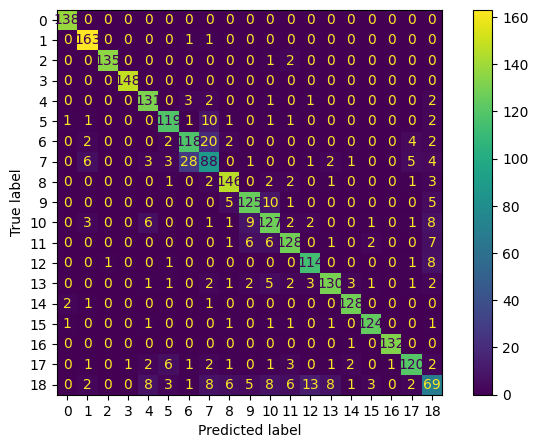

0.8709795321637427


In [42]:
model = DecisionTreeClassifier()       
model.fit(X_train_normalized, y_train)             
y_pred = model.predict(X_test_normalized)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

And also kneighbors with normalization

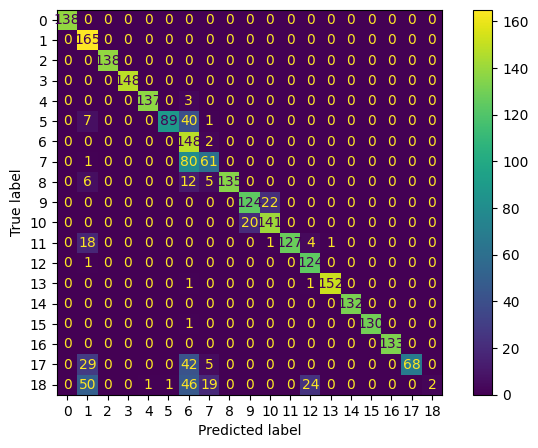

0.8377192982456141


In [48]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_normalized, y_train)
y_pred = neigh.predict(X_test_normalized)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

## Phase 2 (Add Feature selection)

We are using pca as a feature selection algorithm

In [51]:
pca = PCA(n_components = 100) # Number of features is 1% of observations.
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

Lets run the o-v-o svm with dimentinality reduction

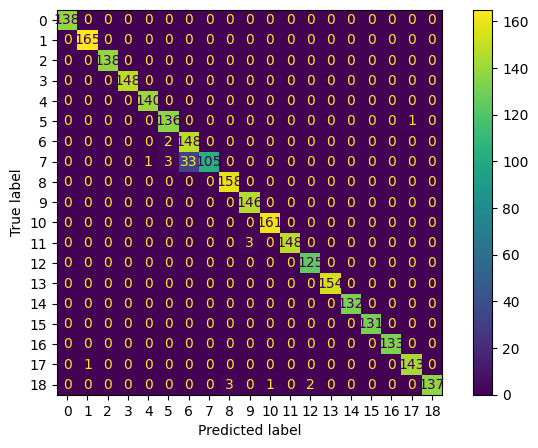

0.9817251461988304


In [54]:
svc_model=SVC()   
ovo_model=OneVsOneClassifier(svc_model)
ovo_model.fit(X_train_pca,y_train)
y_pred = ovo_model.predict(X_test_pca)
fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

And Also decision tree with pca

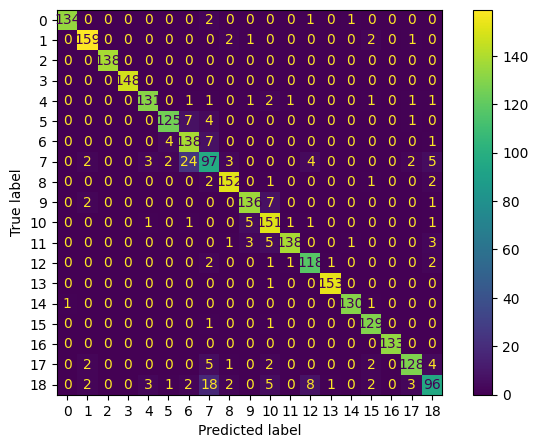

0.9261695906432749


In [52]:
model = DecisionTreeClassifier()       
model.fit(X_train_pca, y_train)             
y_pred = model.predict(X_test_pca)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

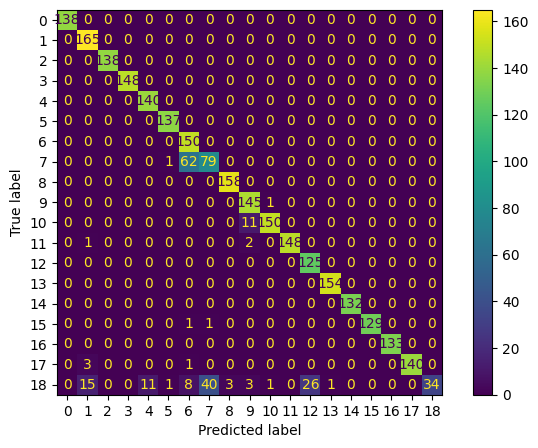

0.9294590643274854


In [53]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_pca, y_train)
y_pred = neigh.predict(X_test_pca)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

## Phase 3 (Preprocessing)

<AxesSubplot: title={'center': 'Dataframe'}>

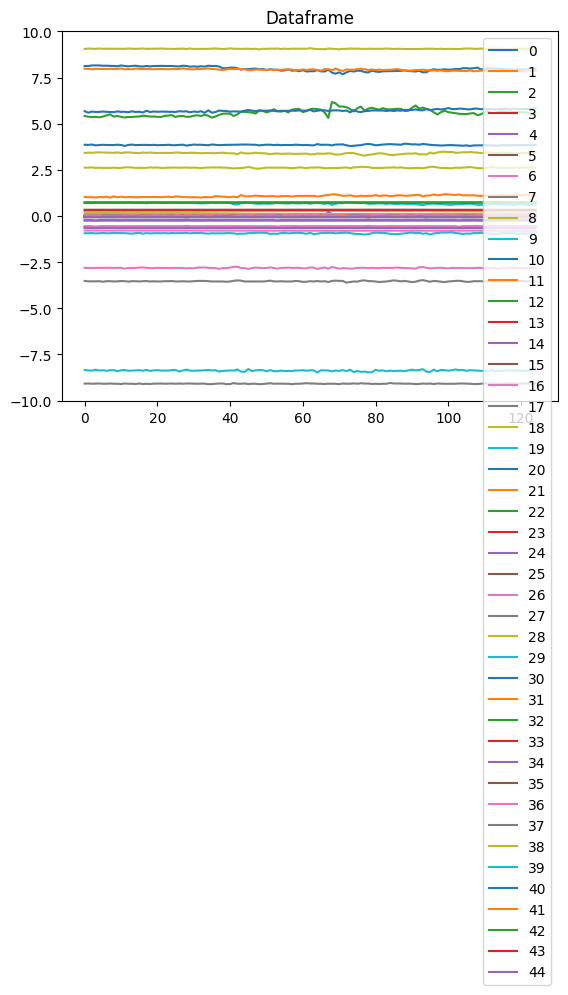

In [55]:
df.plot(title='Dataframe')


Preprocessing one Reading

In [145]:
# First, Let's calculate some statistical features for the given data set.
X = df.values

statistical_features = list(df.min())+list(df.max())+list(df.mean())+list(np.max(df.abs(),axis=0))+list(df.std())+list(df.skew())+list(df.kurtosis()) 

statistical_features.extend(np.mean(X**2,axis=0))#+list(np.sqrt(np.mean(X**2)))
statistical_features.extend(np.sqrt(np.mean(X**2,axis=0)))

np.shape(statistical_features)


(405,)

Extract Frequency features

In [132]:
ft = fft(X)
S = np.abs(ft**2)/len(df)
frequency_features = np.max(S,axis=0)
frequency_features = np.concatenate((frequency_features,np.sum(S,axis=0)))
frequency_features = np.concatenate((frequency_features,np.mean(S,axis=0)))
frequency_features = np.concatenate((frequency_features,np.var(S,axis=0)))
frequency_features = np.concatenate((frequency_features,np.max(np.abs(S),axis=0)))
frequency_features = np.concatenate((frequency_features,stats.skew(S,axis=0)))
frequency_features = np.concatenate((frequency_features,stats.kurtosis(S,axis=0)))

np.shape(frequency_features)

(315,)

In [138]:
features = np.concatenate((statistical_features,frequency_features))
np.shape(features)

(720,)

Re read data and extract features

In [146]:
def read_data_and_feature_extraction(filename):
    """
    A function which will take the text file name and return the data that feature extraction
    """
    df = pd.read_csv('{}'.format(filename), header=None)
    X = df.values

    statistical_features = list(df.min())+list(df.max())+list(df.mean())+list(np.max(df.abs(),axis=0))+list(df.std())+list(df.skew())+list(df.kurtosis()) 

    statistical_features.extend(np.mean(X**2,axis=0))#+list(np.sqrt(np.mean(X**2)))
    statistical_features.extend(np.sqrt(np.mean(X**2,axis=0)))
    ft = fft(X)
    S = np.abs(ft**2)/len(df)
    frequency_features = np.max(S,axis=0)
    frequency_features = np.concatenate((frequency_features,np.sum(S,axis=0)))
    frequency_features = np.concatenate((frequency_features,np.mean(S,axis=0)))
    frequency_features = np.concatenate((frequency_features,np.var(S,axis=0)))
    frequency_features = np.concatenate((frequency_features,np.max(np.abs(S),axis=0)))
    frequency_features = np.concatenate((frequency_features,stats.skew(S,axis=0)))
    frequency_features = np.concatenate((frequency_features,stats.kurtosis(S,axis=0)))

    features = np.concatenate((statistical_features,frequency_features))


    return features

In [147]:
data_list = []
patient_label_list = []
activity_label_list = []
os.chdir(data_path+"\data\\")
activity_list = os.listdir()

for activity in activity_list:
    print(activity)
    os.chdir(activity)
    patients_list = os.listdir()

    for patient in patients_list:
        os.chdir(patient)
        segment_list = os.listdir()

        for segment in segment_list:
            data_list.append(read_data_and_feature_extraction(segment))
            patient_label_list.append(patient)
            activity_label_list.append(activity)
            
        os.chdir('../')
    os.chdir('../')
os.chdir('../')

a01
a02
a03
a04
a05
a06
a07
a08
a09
a10
a11
a12
a13
a14
a15
a16
a17
a18
a19


In [148]:
print(np.shape(data_list))
print(np.shape(patient_label_list))
print(np.shape(activity_label_list))

(9120, 720)
(9120,)
(9120,)


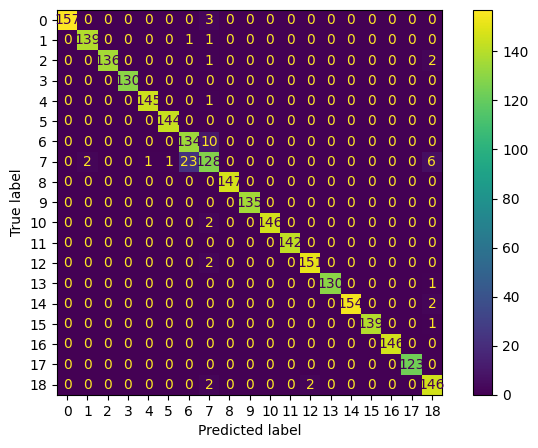

0.9766081871345029


In [149]:
X_train, X_test, y_train, y_test = train_test_split(data_list, activity_label_list, test_size=0.3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

svc_model=SVC()   
ovo_model=OneVsOneClassifier(svc_model)
ovo_model.fit(X_train_normalized,y_train)
y_pred = ovo_model.predict(X_test_normalized)
fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

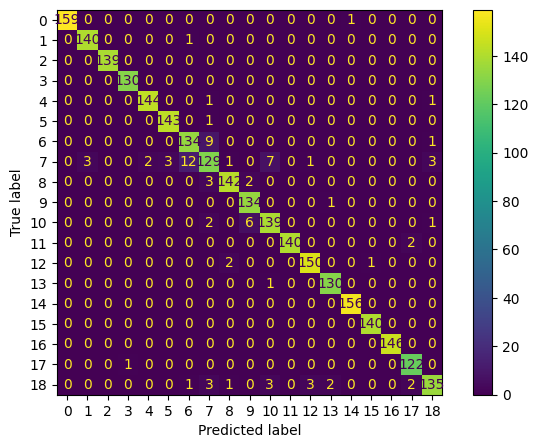

0.9692982456140351


In [150]:
model = DecisionTreeClassifier()       
model.fit(X_train_normalized, y_train)             
y_pred = model.predict(X_test_normalized)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

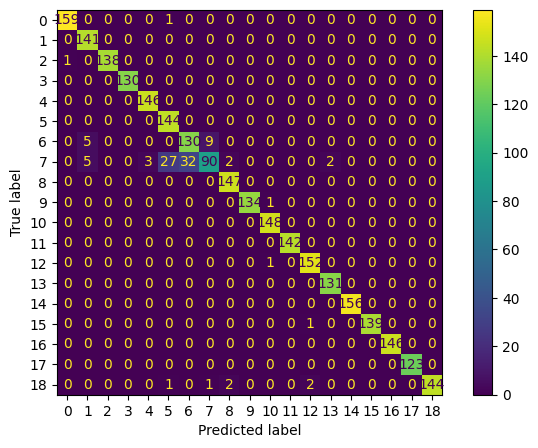

0.9649122807017544


In [151]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_normalized, y_train)
y_pred = neigh.predict(X_test_normalized)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

## Phase 4 (Classification with preprocessing, feature extraction and pca as Feature selection)

In [152]:
pca = PCA(n_components = 100) # Number of features is 1% of observations.
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

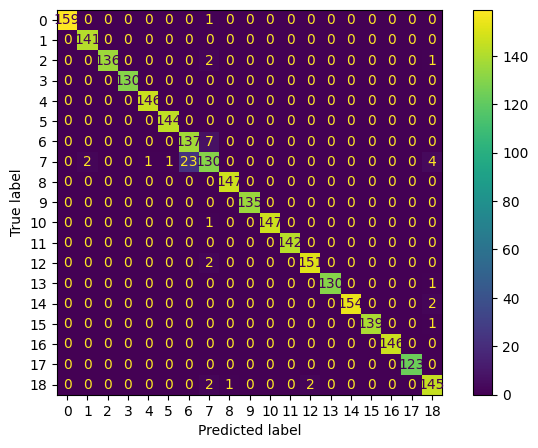

0.9802631578947368


In [153]:
svc_model=SVC()   
ovo_model=OneVsOneClassifier(svc_model)
ovo_model.fit(X_train_pca,y_train)
y_pred = ovo_model.predict(X_test_pca)
fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

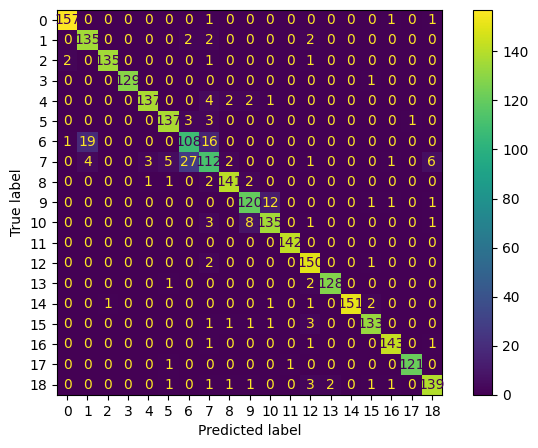

0.9331140350877193


In [154]:
model = DecisionTreeClassifier()       
model.fit(X_train_pca, y_train)             
y_pred = model.predict(X_test_pca)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

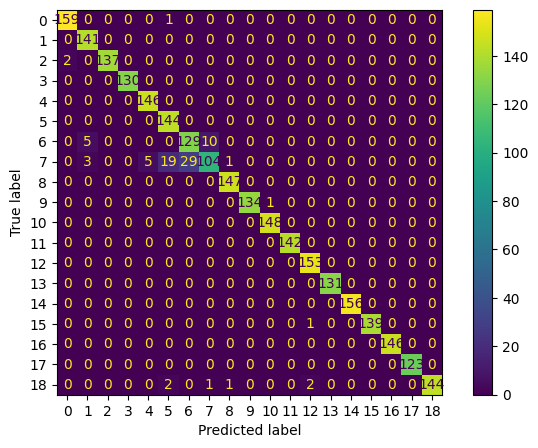

0.9696637426900585


In [155]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_pca, y_train)
y_pred = neigh.predict(X_test_pca)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

## Bounes

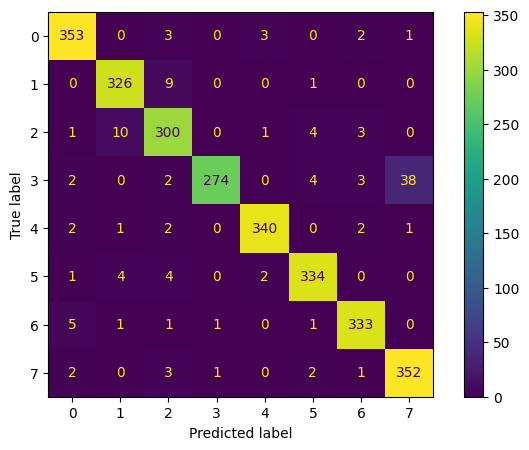

0.9546783625730995


In [156]:
X_train, X_test, y_train, y_test = train_test_split(data_list, patient_label_list, test_size=0.3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

svc_model=SVC()   
ovo_model=OneVsOneClassifier(svc_model)
ovo_model.fit(X_train_normalized,y_train)
y_pred = ovo_model.predict(X_test_normalized)
fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

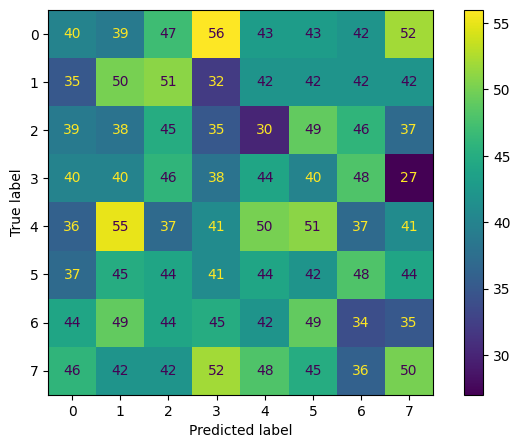

0.12755847953216373


In [157]:
model = DecisionTreeClassifier()       
model.fit(X_train_pca, y_train)             
y_pred = model.predict(X_test_pca)

fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

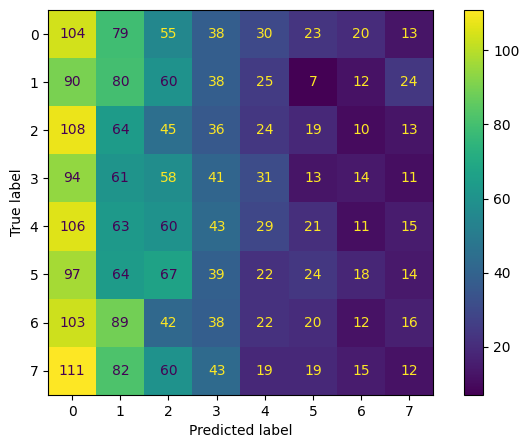

0.12682748538011696


In [163]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_pca, y_train)
y_pred = neigh.predict(X_test_pca)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

In [164]:
pca = PCA(n_components = 100) # Number of features is 1% of observations.
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

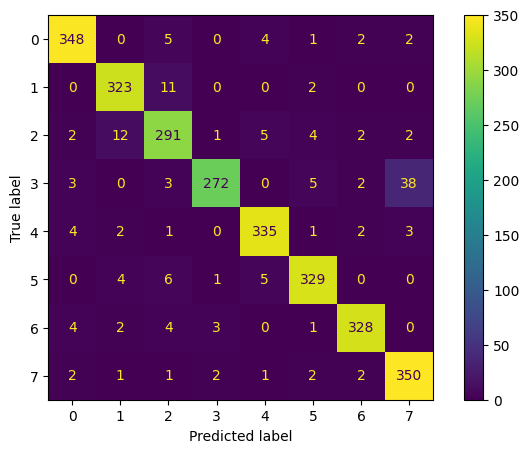

0.9415204678362573


In [165]:
svc_model=SVC()   
ovo_model=OneVsOneClassifier(svc_model)
ovo_model.fit(X_train_pca,y_train)
y_pred = ovo_model.predict(X_test_pca)
fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

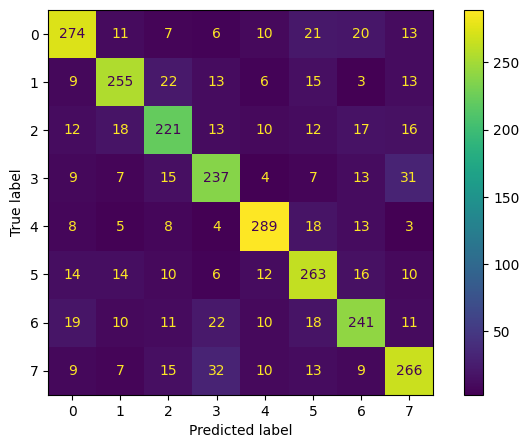

0.7478070175438597


In [166]:
model = DecisionTreeClassifier()       
model.fit(X_train_pca, y_train)             
y_pred = model.predict(X_test_pca)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))

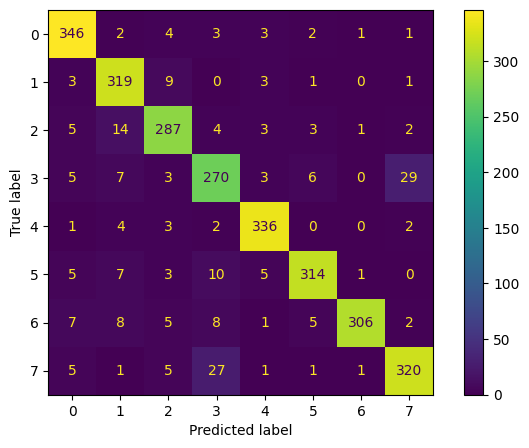

0.9130116959064327


In [167]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_pca, y_train)
y_pred = neigh.predict(X_test_pca)

fig, ax = plt.subplots(figsize=(8, 5))   
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)            
plt.show()
print(accuracy_score(y_test, y_pred))